<a href="https://colab.research.google.com/github/bsaiashish/TestGit/blob/master/saiaudioproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/bsaiashish/audioproj2.git

Cloning into 'audioproj2'...
remote: Enumerating objects: 356, done.
remote: Total 356 (delta 0), reused 0 (delta 0), pack-reused 356
Receiving objects: 100% (356/356), 94.17 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Checking out files: 100% (306/306), done.


In [3]:
ls

audioproj2/  sample_data/


In [4]:
cd audioproj2

/content/audioproj2


In [5]:
! pip install python_speech_features

  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1
            
            
    



In [0]:
def envelope(y, rate, threshold):
  mask = []
  y = pd.Series(y).apply(np.abs)
  y_mean = y.rolling(window=int(rate/10), min_periods=1, center = True).mean()
  for mean in y_mean:
    if mean>threshold:
      mask.append(True)
    else:
      mask.append(False)
      
  return mask    

In [0]:
def calc_fft(y, rate):
  n = len(y)
  freq = np.fft.rfftfreq(n, d=1/rate)
  Y = abs(np.fft.rfft(y)/n)
  return(Y,freq)

In [0]:
df = pd.read_csv('instruments.csv')

In [10]:
pwd

'/content/audioproj2'

In [11]:
df

,fname,label
0,5388d14d.wav,Saxophone
1,c685f05f.wav,Saxophone
2,36d20ab5.wav,Saxophone
3,d6665734.wav,Saxophone
4,7352e28f.wav,Saxophone
5,8fa096bf.wav,Saxophone
6,2f9c5f62.wav,Saxophone
7,9cd05a2b.wav,Saxophone
8,ab465bf9.wav,Saxophone
9,c40632d7.wav,Saxophone


In [0]:
df.set_index('fname', inplace=True)

In [0]:
for f in df.index:
  rate, signal = wavfile.read('wavfile0/'+f)
  df.at[f,'length'] = signal.shape[0]/rate

In [14]:
df

,label,length
fname,,
5388d14d.wav,Saxophone,4.14
c685f05f.wav,Saxophone,1.54
36d20ab5.wav,Saxophone,4.90
d6665734.wav,Saxophone,10.50
7352e28f.wav,Saxophone,6.24
8fa096bf.wav,Saxophone,3.70
2f9c5f62.wav,Saxophone,5.00
9cd05a2b.wav,Saxophone,15.22
ab465bf9.wav,Saxophone,15.40


In [0]:
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

In [16]:
class_dist

label
Acoustic_guitar     6.948667
Bass_drum           1.937333
Cello               5.000667
Clarinet            6.596000
Double_bass         3.206000
Flute               8.054667
Hi-hat              3.357333
Saxophone           7.124000
Snare_drum          3.987333
Violin_or_fiddle    4.530000
Name: length, dtype: float64

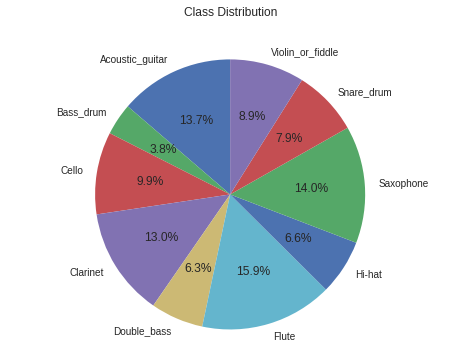

In [17]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',shadow=False, startangle=90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)


In [18]:
ls

eda.py           LICENSE   README.md         wavfile0/
instruments.csv  model.py  requirements.txt


In [19]:
pwd

'/content/audioproj2'

In [0]:
mkdir samples

In [0]:
mkdir clean

In [22]:
ls

clean/  instruments.csv  model.py   requirements.txt  wavfile0/
eda.py  LICENSE          README.md  samples/


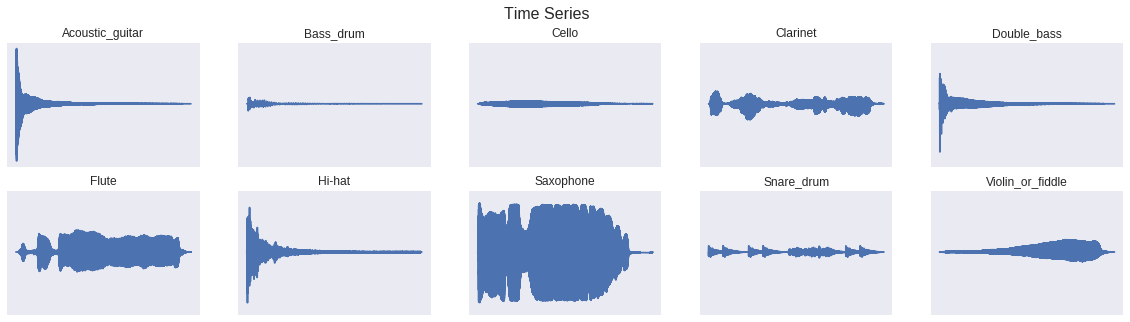

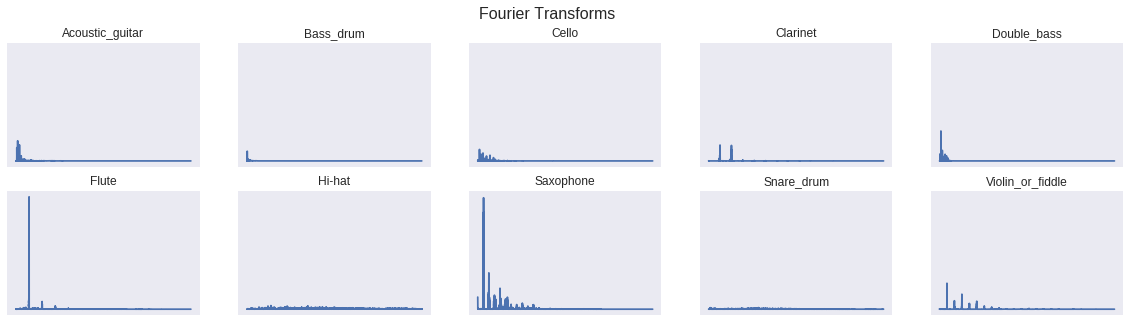

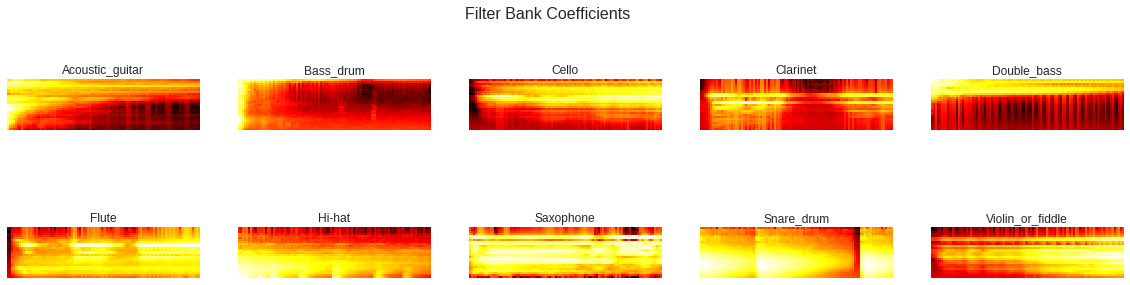

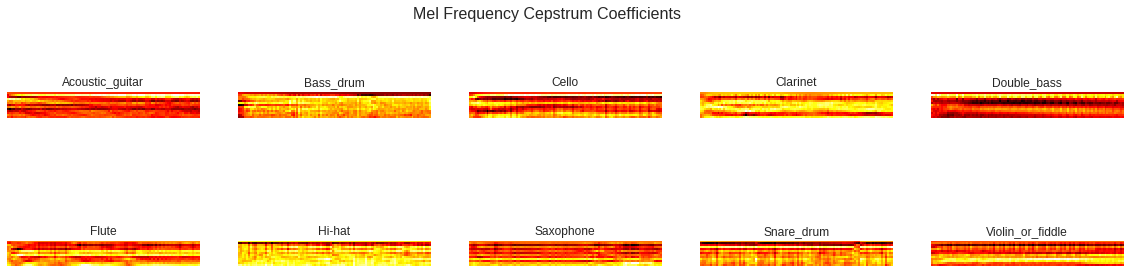

In [23]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

import librosa
for c in classes:
  wav_file = df[df.label == c].iloc[0,0]
  signal, rate = librosa.load('wavfile0/'+wav_file, sr=44100)
  mask = envelope(signal, rate, 0.0005)
  signal = signal[mask]
  signals[c] = signal
  fft[c] = calc_fft(signal, rate)
  
  bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
  fbank[c] = bank
  mel = mfcc(signal[:rate], rate, numcep = 13, nfilt=26, nfft=1103).T
  mfccs[c] = mel
  
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()


In [24]:
if len(os.listdir('clean')) == 0:
  for f in tqdm(df.fname):
    signal, rate = librosa.load('wavfile0/'+f, sr=16000)
    mask = envelope(signal, rate, 0.0005)
    wavfile.write(filename='clean/'+f, rate=rate, data=signal[mask])


100%|██████████| 300/300 [01:19<00:00,  4.27it/s]


In [25]:
pwd

'/content/audioproj2'

In [26]:
ls


clean/  instruments.csv  model.py   requirements.txt  wavfile0/
eda.py  LICENSE          README.md  samples/


In [27]:
cd clean

/content/audioproj2/clean


In [28]:
ls

00353774.wav  367ad7b1.wav  673defaf.wav  9f6eac9c.wav  cbc8d551.wav
0091fc7f.wav  36d06cc0.wav  68589f79.wav  9f84ea5a.wav  cdc5fe8e.wav
01c2f88b.wav  36d20ab5.wav  6a037ddf.wav  a053797b.wav  cdeece57.wav
0286fc27.wav  3707da71.wav  6a210ffa.wav  a090c45a.wav  cdfc8967.wav
0356dec7.wav  37cebbd4.wav  6a96272b.wav  a0cbe92e.wav  ce3f3400.wav
03fc1f96.wav  38216fad.wav  6b27a847.wav  a1b369d7.wav  ce65d6b5.wav
06c48eab.wav  3a3d0279.wav  6d21ad67.wav  a25423a8.wav  ce75b5ce.wav
078f7ac0.wav  3a80061f.wav  6eb59008.wav  a59b5a08.wav  cfb9c5fd.wav
07db7f16.wav  3a9085ca.wav  6ef82473.wav  a64a3740.wav  d14f5df1.wav
09a1cfd7.wav  3aafb6ad.wav  6efbaf90.wav  a6728901.wav  d328db67.wav
0c67f402.wav  3c66098d.wav  6fca680b.wav  a7964699.wav  d6144e01.wav
0ddb4bdf.wav  3c713bcf.wav  70ca9c77.wav  aa9ae956.wav  d6665734.wav
0e7cd4eb.wav  3cbe9902.wav  71c6451f.wav  aab28420.wav  d6854eb4.wav
0ed06544.wav  3d3439f1.wav  7352e28f.wav  ab465bf9.wav  d84c8c43.wav
0eeaebcb.wav  3e2bddda.wav  736771

In [29]:
pwd

'/content/audioproj2/clean'

In [30]:
cd ..

/content/audioproj2


In [31]:
cd ..

/content


In [32]:
ls

audioproj2/  sample_data/


In [33]:
cd audioproj2

/content/audioproj2


In [34]:
ls

clean/  instruments.csv  model.py   requirements.txt  wavfile0/
eda.py  LICENSE          README.md  samples/


In [35]:
pwd

'/content/audioproj2'

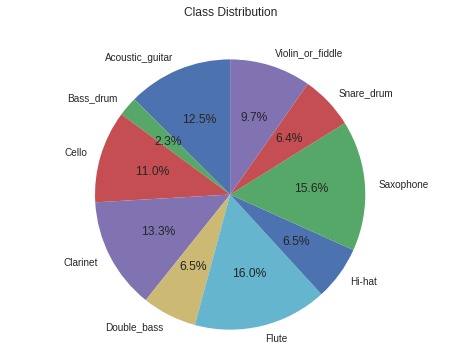

100%|██████████| 26410/26410 [00:57<00:00, 458.29it/s]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 13, 9, 16)         160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 9, 32)         4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 9, 64)         18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 9, 128)        73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
__________

In [42]:
import os
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPool2D, Flatten, LSTM
from keras.layers import Dropout, Dense, TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
from python_speech_features import mfcc

def build_rand_feat():
  X = []
  y = []
  _min, _max = float('inf'), -float('inf')
  for _ in tqdm(range(n_samples)):
    rand_class = np.random.choice(class_dist.index, p=prob_dist)
    file = np.random.choice(df[df.label==rand_class].index)
    rate, wav = wavfile.read('clean/'+file)
    label = df.at[file, 'label']
    rand_index = np.random.randint(0, wav.shape[0]-config.step)
    sample = wav[rand_index:rand_index+config.step]
    X_sample = mfcc(sample, rate, 
                   numcep=config.nfeat, nfilt=config.nfilt, nfft=config.nfft).T
    _min = min(np.amin(X_sample), _min)
    _max = max(np.amax(X_sample), _max)
    X.append(X_sample if config.mode == 'conv' else X_sample.T)
    y.append(classes.index(label))
  X, y = np.array(X), np.array(y)
  X = (X - _min)/(_max - _min)
  if config.mode == 'conv':
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
  elif config.mode == 'time':
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2])
    
  y = to_categorical(y, num_classes=10)
  
  return X, y   

def get_conv_model():
  model = Sequential()
  model.add(Conv2D(16, (3,3), activation='relu', strides=(1,1), 
                   padding='same', input_shape = input_shape))
  model.add(Conv2D(32, (3,3), activation='relu', strides=(1,1),
                   padding='same'))
  model.add(Conv2D(64, (3,3), activation='relu', strides=(1,1),
                   padding='same'))
  model.add(Conv2D(128,(3,3), activation='relu', strides=(1,1),
                   padding='same'))
  
  model.add(MaxPool2D((2,2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['acc'])
  return model
  
  

class Config:
  def __init__(self, mode='conv', nfilt=26, nfeat=13, nfft=512, rate=16000):
    self.mode = mode
    self.nfilt = nfilt
    self.nfeat = nfeat
    self.nfft = nfft
    self.rate= rate
    self.step = int(rate/10)

df = pd.read_csv('instruments.csv')
df.set_index('fname', inplace=True)

for f in df.index:
    rate, signal = wavfile.read('clean/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate

classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

n_samples = 2 * int (df['length'].sum()/0.1)
prob_dist = class_dist/class_dist.sum()
choices = np.random.choice(class_dist.index, p=prob_dist)



fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

config = Config(mode='conv')

if config.mode == 'conv':
  X, y = build_rand_feat()
  y_flat = np.argmax(y, axis=1)
  input_shape = (X.shape[1], X.shape[2], 1)
  model = get_conv_model()
  
  
  
elif config.mode == 'time':
  X, y = build_rand_feat()
  y_flat = np.argmax(y, axis=1)
  input_shape = (X.shape[1], X.shape[2])
  model = get_recurrent_model()
  
class_weight = compute_class_weight('balanced', np.unique(y_flat), y_flat)

model.fit(X, y, epochs=10, batch_size=32,
         shuffle=True,
         class_weight = class_weight)


